# Feature Detection

- 학번 : 20233142
- 이름 :박정은

---

OpenCV를 사용하여 다음과 같은 다양한 feature detection 알고리즘을 사용해본다.

- Harris corner detection
- FAST
- ORB (Oriented FAST and Rotated BRIEF)
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded-Up Robust Features)


**참고**

- [OpenCV tutorial - Feature Detection and Description](https://docs.opencv.org/master/db/d27/tutorial_py_table_of_contents_feature2d.html)
- [OpenCV document](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html)
- [이미지 특징 추출 (데이터 사이언스 스쿨)](https://datascienceschool.net/03%20machine%20learning/03.02.05%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%8A%B9%EC%A7%95%20%EC%B6%94%EC%B6%9C.html)

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

# OpenCV 버전 변경

SIFT, SURF Feature 사용을 위해 현재 Colab 서버에 설치되어 있는 OpenCV 버전을 변경한다.

In [1]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-contrib-python==3.4.18.65

Found existing installation: opencv-contrib-python 3.4.18.65
Uninstalling opencv-contrib-python-3.4.18.65:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/cv2/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python-3.4.18.65.dist-info/*
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/opencv_contrib_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.10/dist

In [2]:
# 관련 패키지 임포트
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy 1.25.2
opencv 3.4.18


## Google Drive와 연동하기

구글 드라이브와 colab을 연동하여 드라이브에 있는 파일들을 가져올 수 있게 한다.

- 아래 코드를 실행
- 출력된 링크를 클릭해 구글 계정 로그인
- 로그인 후 나오는 코드를 복사하여 붙여넣기

[참고: 코랩 사용법 (데이터 사이언스 스쿨)](https://datascienceschool.net/view-notebook/f9d9fddb7cc7494a9e4be99f0e137be0/)


In [3]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


좌측의 파일 아이콘을 선택하거나 아래 명령어를 통해 파일을 확인할 수 있다.

In [4]:
!ls '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/'

work1


In [5]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/work1/'

### opencv를 사용해 이미지 불러오기

- `cv.imread()`를 이용해 이미지를 불러오면 RGB가 아닌 BGR 이미지임을 유의해야 한다.

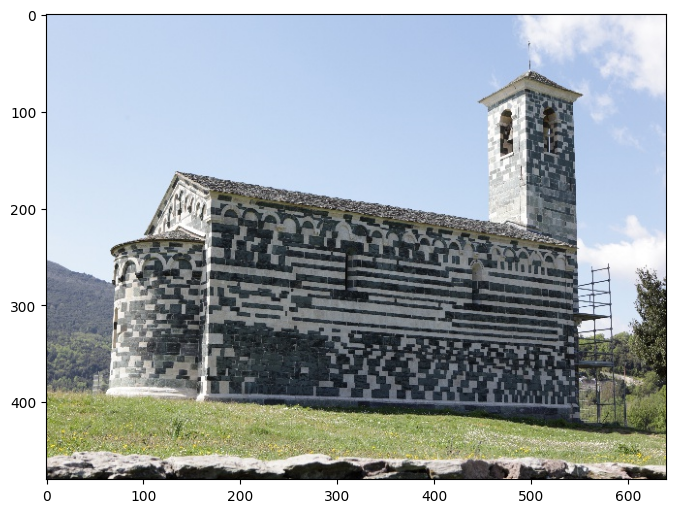

In [6]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.show()

## Harris Corner Detection

해리스 코너 추출 함수 `cornerHarris`는 이미지 위에 커널을 이동시키면서 그레디언트의 변화량을 구하고 이 값을 적절한 기준값으로 구별하여 코너점을 찾는다.

**과제**
- 해리스 코너를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수
`dst	=	cv.cornerHarris(	src, blockSize, ksize, k[, dst[, borderType]]	)`


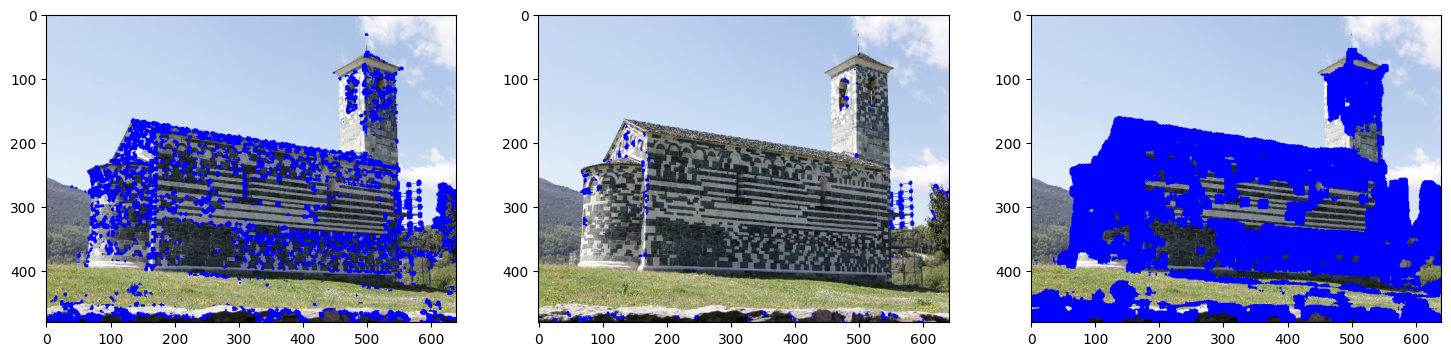

In [19]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img1 = img.copy()
img2 = img.copy()
img3 = img.copy()

# To-do
dst = cv.cornerHarris(gray, 6, 3, 0.04)
#                           ㄴ> 고려할 주변 픽셀 범위
img1[dst > 0.01*dst.max()] = [255, 0, 0] # 원본이미지에서 0.01*dst.max()를 넘으면 파란색으로 표시하기
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB) #색상 다시 바꿔주기

dst = cv.cornerHarris(gray, 6, 3, 0.04)
img2[dst > 0.1*dst.max()] = [255, 0, 0] #임계값을 낮춰보기
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB) #    -> 특징점이 적어짐

dst = cv.cornerHarris(gray, 15, 3, 0.04) #고려할 주변 픽셀 범위를 넓혀보기
img3[dst > 0.01*dst.max()] = [255, 0, 0] #               -> 특징점이 더 많아짐
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(img3)

plt.show()
#참고: https://blog.naver.com/samsjang/220637582963
#https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345

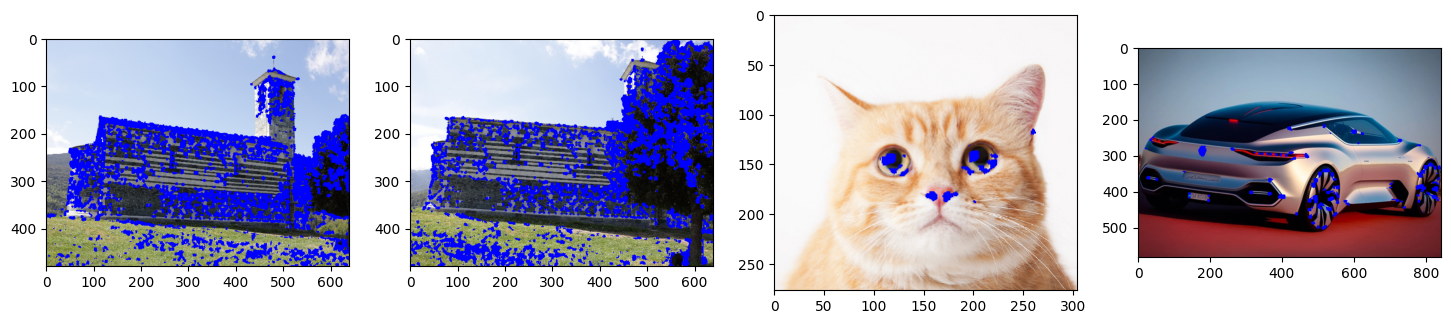

In [25]:
img1 = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
img3 = cv.imread( ROOT + 'feature/cat.png')
img4 = cv.imread( ROOT + 'feature/car1.png')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# To-do
dst = cv.cornerHarris(gray1, 6, 3, 0.04)
img1[dst > 0.01*dst.max()] = [255, 0, 0]
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

dst = cv.cornerHarris(gray2, 6, 3, 0.04)
img2[dst > 0.01*dst.max()] = [255, 0, 0]
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

dst = cv.cornerHarris(gray3, 6, 3, 0.003)
img3[dst > 0.01*dst.max()] = [255, 0, 0]
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

dst = cv.cornerHarris(gray4, 10, 9, 0.04)
img4[dst > 0.01*dst.max()] = [255, 0, 0]
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 4, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 4, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 4, 3)
plt.imshow(img3)

ax4 = fig.add_subplot(1, 4, 4)
plt.imshow(img4)

plt.show()

### Fast Corner Detection

연산이 빠른 corner detection 알고리즘이다


**과제**
- FAST feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.FastFeatureDetector_create(	[, threshold[, nonmaxSuppression[, type]]]	)`

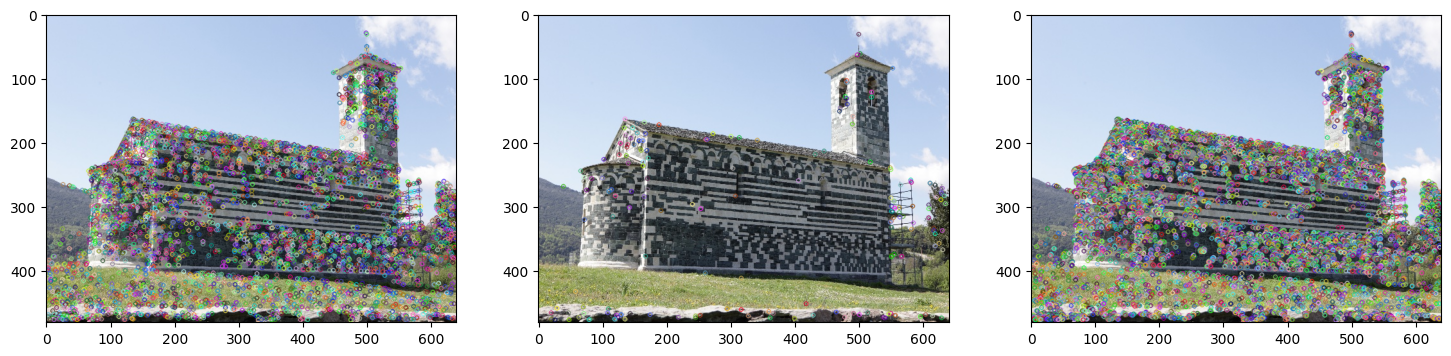

In [28]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img1 = img.copy()
img2 = img.copy()
img3 = img.copy()

# To-do
#Fast특징 검출기 생성                   임계값은 40 ~ 60이 적당
retval = cv.FastFeatureDetector_create(threshold=40, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray, None) #특징점 검출
img1 = cv.drawKeypoints(img1, keypoints, None) #키 포인트 그리기
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
#                                        임계값 높이기 -> 특징점 개수 적어짐
retval = cv.FastFeatureDetector_create(threshold=100, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

#non-max-Suppression: object detector가 예측한 bounding box 중에서 정확한 bounding box를 선택하도록 하는 기법
retval = cv.FastFeatureDetector_create(threshold=40, nonmaxSuppression=False, type=None)
keypoints = retval.detect(gray, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(img3)

plt.show()
#참고: https://deep-learning-study.tistory.com/251
#https://bkshin.tistory.com/entry/OpenCV-26-%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9D%98-%ED%8A%B9%EC%A7%95%EA%B3%BC-%ED%82%A4-%ED%8F%AC%EC%9D%B8%ED%8A%B8

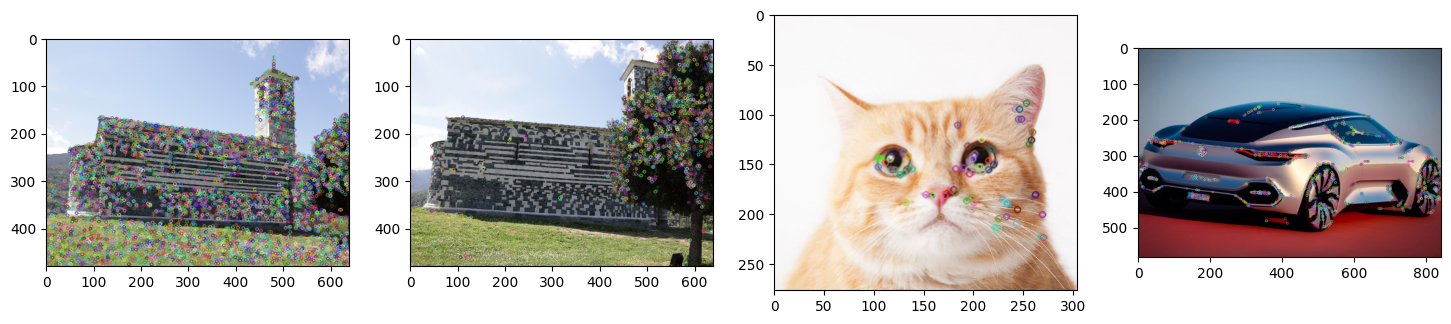

In [32]:
img1 = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
img3 = cv.imread( ROOT + 'feature/cat.png')
img4 = cv.imread( ROOT + 'feature/car1.png')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# To-do
retval = cv.FastFeatureDetector_create(threshold=40, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray1, None)
img1 = cv.drawKeypoints(img1, keypoints, None)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

retval = cv.FastFeatureDetector_create(threshold=100, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray2, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

retval = cv.FastFeatureDetector_create(threshold=40, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray3, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
#                                                         car에서는 검출이 잘 되지않음. 임계값 낮춰봄
retval = cv.FastFeatureDetector_create(threshold=10, nonmaxSuppression=True, type=None)
keypoints = retval.detect(gray4, None)
img4 = cv.drawKeypoints(img4, keypoints, None)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 4, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 4, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 4, 3)
plt.imshow(img3)

ax4 = fig.add_subplot(1, 4, 4)
plt.imshow(img4)

plt.show()

### ORB(Oriented FAST and Rotated BRIEF) detector

FAST 와 BRIEF를 기반으로 만들어진 알고리즘이다. 논문에서는 SURF와 SIFT보다 매우 빠르고, SURF 보다 정확한, 낮은 컴퓨팅 파워 환경에서 돌리기에 좋은 알고리즘이라 소개 한다.

**과제**
-  ORB feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`	retval	=	cv.ORB_create(	[, nfeatures[, scaleFactor[, nlevels[, edgeThreshold[, firstLevel[, WTA_K[, scoreType[, patchSize[, fastThreshold]]]]]]]]]	)`


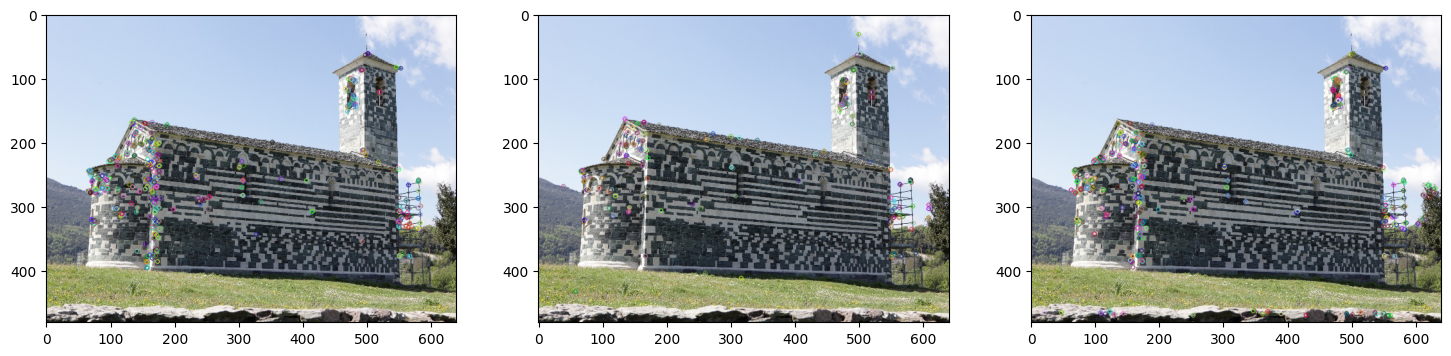

In [39]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img1 = img.copy()
img2 = img.copy()
img3 = img.copy()

# To-do
retval = cv.ORB_create()
#키 포인트 검출과 서술자 계산
keypoints, descriptor = retval.detectAndCompute(img1, None)
img1 = cv.drawKeypoints(img1, keypoints, None)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

#nfeatures: 검출할 최대 특징점의 수, nlevels: 이미지 피라미드의 레벨 수, edgeThreshold: 특징점이 이미지 가장자리로부터 얼마나 가깝게 위치할 수 있는지를 결정
#firstLevel: 이미지 피라미드에서 시작할 레벨, WTA_K: 각 특징점에서 비교할 포인트의 수를 결정, scaleFactor: 이전 피라미드 레벨과 다음 레벨 사이의 스케일 비율
#fastThreshold: FAST 알고리즘에서 사용되는 임계값
retval = cv.ORB_create(nfeatures = 500, nlevels = 8, edgeThreshold = 31, firstLevel = 0, WTA_K = 2, scaleFactor=1.2,fastThreshold=100)
keypoints, descriptor = retval.detectAndCompute(img2, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
#                                                   edge임계값과 fast임계값을 각각 낮춰봄
retval = cv.ORB_create(nfeatures = 500, nlevels = 8, edgeThreshold = 10, firstLevel = 0, WTA_K = 2, scaleFactor=1.2,fastThreshold=50)
keypoints, descriptor = retval.detectAndCompute(img3, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(img3)

plt.show()

#참고: https://jeongwooyeol0106.tistory.com/54

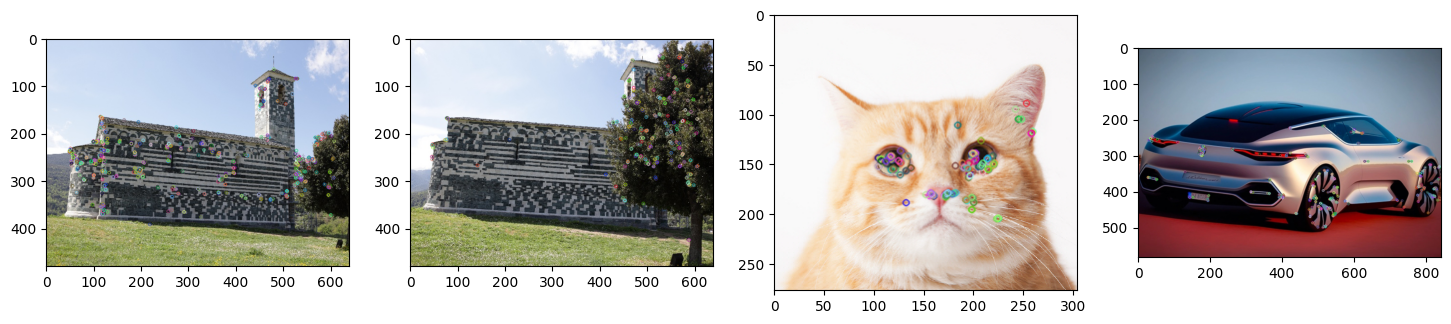

In [41]:
img1 = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
img3 = cv.imread( ROOT + 'feature/cat.png')
img4 = cv.imread( ROOT + 'feature/car1.png')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# To-do

retval = cv.ORB_create()
keypoints, descriptor = retval.detectAndCompute(img1, None)
img1 = cv.drawKeypoints(img1, keypoints, None)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

retval = cv.ORB_create(nfeatures = 500, nlevels = 8, edgeThreshold = 31, firstLevel = 0, WTA_K = 2, scaleFactor=1.2,fastThreshold=100)
keypoints, descriptor = retval.detectAndCompute(img2, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

retval = cv.ORB_create(nfeatures = 500, nlevels = 8, edgeThreshold = 10, firstLevel = 2, WTA_K = 2, scaleFactor=1.2,fastThreshold=50)
keypoints, descriptor = retval.detectAndCompute(img3, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

retval = cv.ORB_create(nfeatures = 500, nlevels = 4, edgeThreshold = 5, firstLevel = 0, WTA_K = 2, scaleFactor=1.2,fastThreshold=5)
keypoints, descriptor = retval.detectAndCompute(img4, None)
img4 = cv.drawKeypoints(img4, keypoints, None)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 4, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 4, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 4, 3)
plt.imshow(img3)

ax4 = fig.add_subplot(1, 4, 4)
plt.imshow(img4)

plt.show()

### SIFT feature detection

SIFT(Scale-Invariant Feature Transform)은 특징점의 크기와 각도까지 같이 계산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있도록 하는 방법이다. 또한 특징점 근처의 이미지 특성(히스토그램)도 같이 계산해서 특징점 이미지의 모양도 구별할 수 있도록 한다.

**과제**
- SIFT feature를 찾고, 이를 시각화한다.
- 파라미터를 바꿔가며 실험해본다.
- 제공한 이미지 외에 다른 이미지에도 적용하여 분석해 본다.

관련 함수

`retval	=	cv.SIFT_create(	[, nfeatures[, nOctaveLayers[, contrastThreshold[, edgeThreshold[, sigma]]]]]	)
`

In [ ]:
# 아래 패키지를 임포트한다
#!pip install opencv-contrib-python-nonfree

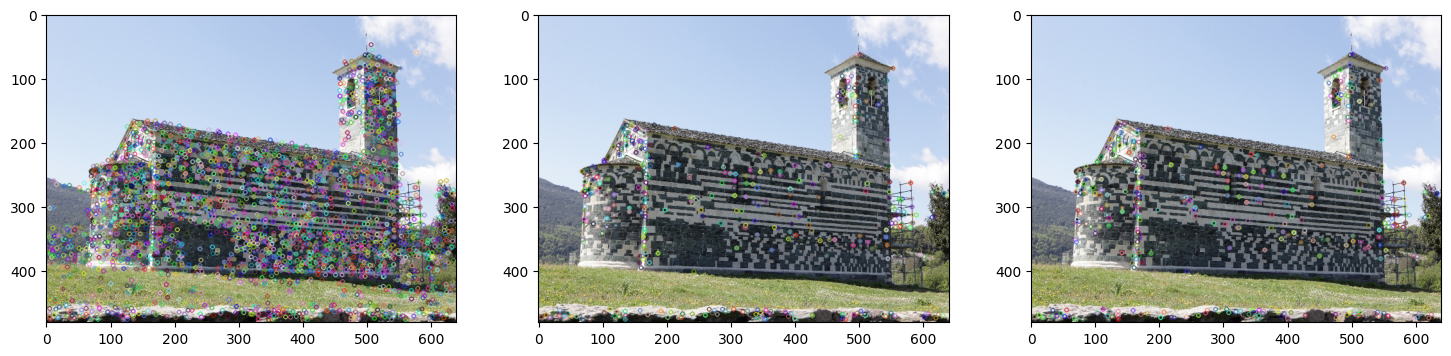

In [45]:
img = cv.imread( ROOT + 'feature/DPP_0010.JPG')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img1 = img.copy()
img2 = img.copy()
img3 = img.copy()

# To-do
retval = cv.SIFT_create()
keypoints, descriptors = retval.detectAndCompute(gray, None)
img1 = cv.drawKeypoints(img1, keypoints, None)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

#nfeatures: 반환될 최대 특징점의 수, nOctaveLayers: 이미지 피라미드에서 각 옥타브의 레이어 수, contrastThreshold: 이 값보다 대비가 낮은 특징점들은 무시
retval = cv.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04,edgeThreshold=100, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

#edgeThreshold: 이 값이 낮을수록 엣지에 가까운 특징점들을 더 많이 거름, sigma: 가우시안 필터의 시그마 값
retval = cv.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04,edgeThreshold=10, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)


fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(img3)

plt.show()

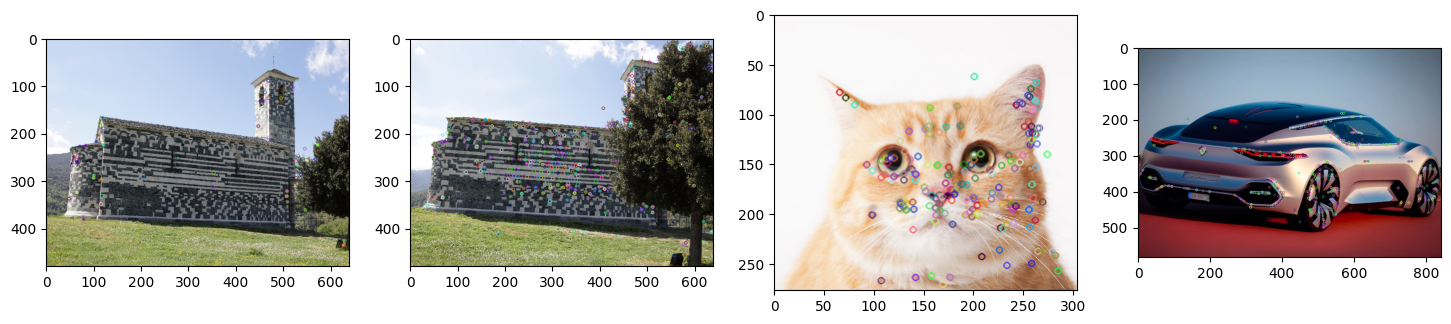

In [51]:
img1 = cv.imread( ROOT + 'feature/DPP_0011.JPG')
img2 = cv.imread( ROOT + 'feature/DPP_0013.JPG')
img3 = cv.imread( ROOT + 'feature/cat.png')
img4 = cv.imread( ROOT + 'feature/car1.png')

gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)
gray4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# To-do

retval = cv.SIFT_create(nfeatures=100, nOctaveLayers=3, contrastThreshold=0.07,edgeThreshold=70, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray1, None)
img1 = cv.drawKeypoints(img1, keypoints, None)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

 #Threshhold를 높게 잡으니 위 코드보다 코너 검출이 정확해보임
retval = cv.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04,edgeThreshold=110, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray2, None)
img2 = cv.drawKeypoints(img2, keypoints, None)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

retval = cv.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04,edgeThreshold=10, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray3, None)
img3 = cv.drawKeypoints(img3, keypoints, None)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

retval = cv.SIFT_create(nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04,edgeThreshold=100, sigma=1.6)
keypoints, descriptors = retval.detectAndCompute(gray4, None)
img4 = cv.drawKeypoints(img4, keypoints, None)
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(1, 4, 1)
plt.imshow(img1)

ax2 = fig.add_subplot(1, 4, 2)
plt.imshow(img2)

ax3 = fig.add_subplot(1, 4, 3)
plt.imshow(img3)

ax4 = fig.add_subplot(1, 4, 4)
plt.imshow(img4)

plt.show()

### 추가 점수 과제

- 지금까지 사용해본 feature detection 알고리즘들을 조사해 보고, 각 알고리즘간의 차이와 장단점을 서술하시오.

##Harris Corner Detection
Harris Corner Detection은 이미지에서 모서리나 코너를 찾는 데 특히 효과적인 알고리즘입니다. Harris Corner Detection 알고리즘은 이미지밝기가 변화하는 것에 민감하고, 이미지가 회전해도 변하지 않아 모서리와 같은 뚜렷한 특징점을 효과적으로 검출할 수 있습니다. 하지만 계산 비용이 높고 노이즈에 민감하며, 밝기가 낮을 때 성능이 저하될 수 있다는 단점을 가지고 있습니다.



##Fast Corner Detection
Fast Corner Detection은 Harris Corner Detection과 속도면에서 차이가 발생합니다. 이미지의 밝기 변화에 민감하여 모서리 같은 특징점을 효과적으로 검출할 수 있다는 점은 공통점이지만 Harris Corner Detection알고리즘과 달리 적은 계산량으로 많은 특징점을 빠르게 검출할 수 있다는 것이 차이입니다. 하지만 Harris 방법에 비해 정확도가 낮다는 단점이 있습니다.



## ORB
ORB (Oriented FAST and Rotated BRIEF)는 FAST의 빠른 속도와 BRIEF 기술의 특징점 표현 방법을 결합하여 빠른 속도와 함께 이미지가 회전해도 변하지않고, SIFT보다 계산 비용이 낮다는 차이가 있습니다. 하지만 SIFT에 비해 정확도가 낮으며 밝기 변화에 민감해 밝기에 따른 성능 저하가 발생할 수 있다는 것이 단점입니다.


##SIFT
SIFT (Scale-Invariant Feature Transform)는 이미지의 크기 변화, 회전, 밝기 변화에 특화된 알고리즘입니다. SIFT는 이미지에서 Scale Space를 만들어 같은 옥타브 내에 인접한 두 개의 이미지끼리 차이를 구하는 연산인 DOG(Difference of Gaussian)을 수행한 후, 나쁜 ketpoint를 제거합니다. 이후 keypoint에 방향을 할당하고, 최종 keypoint를 산출합니다(그림참고).SIFT는 다중 스케일 이미지 피라미드를 사용하여 특징점을 표현하기때문에 안정적이고 정확하지만 계산량이 많고 다른 알고리즘에 비해 상대적으로 처리 속도가 느리다는 단점이 있습니다.

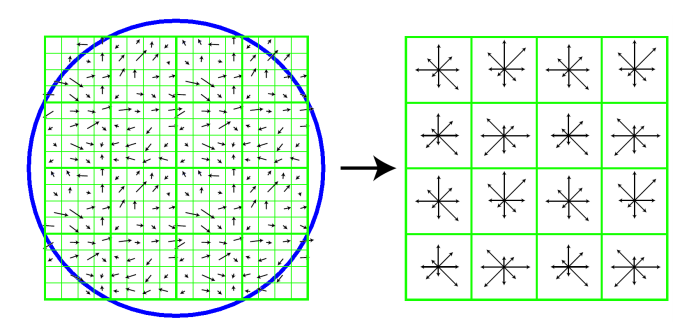